<a href="https://colab.research.google.com/github/payalporwal/ANN-Model/blob/main/Digit_Recognizer_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
 print(x_train.shape)
 print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_test[0].shape

(28, 28)

7


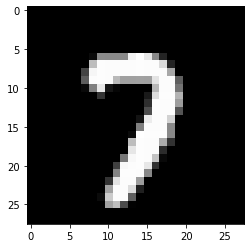

In [ ]:
import matplotlib.pyplot as plt
i = 1300

plt.imshow(x_train[i],cmap='gray')
print(y_train[i])

In [ ]:
y_train[13]

6

In [ ]:
# Building the Layers
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=70,validation_data=(x_test,y_test))

Epoch 1/70
1875/1875 [==============================] - 4s 2ms/step - loss: 7.7715 - accuracy: 0.8709 - val_loss: 0.5996 - val_accuracy: 0.9107
Epoch 2/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3543 - accuracy: 0.9380 - val_loss: 0.3588 - val_accuracy: 0.9315
Epoch 3/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3006 - accuracy: 0.9414 - val_loss: 0.3206 - val_accuracy: 0.9424
Epoch 4/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2633 - accuracy: 0.9460 - val_loss: 0.4145 - val_accuracy: 0.9391
Epoch 5/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9488 - val_loss: 0.3201 - val_accuracy: 0.9395
Epoch 6/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2111 - accuracy: 0.9551 - val_loss: 0.3489 - val_accuracy: 0.9399
Epoch 7/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2037 - accuracy: 0.9568 - val_loss: 0.2457 - val_accuracy:

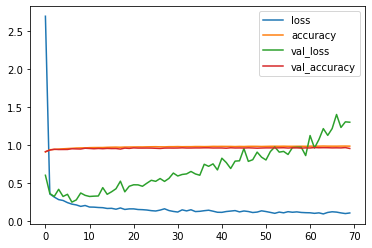

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
import numpy as np
y_pred = model.predict(x_test) 
y_pred = np.argmax(y_pred,axis=1) 
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 962,    0,    1,    2,    0,    2,    6,    0,    4,    4],
       [   1, 1127,    3,    0,    2,    0,    4,    4,    1,    5],
       [   2,    2,  998,    5,    2,    0,    0,    7,    5,    0],
       [   0,    1,    1,  944,    0,    4,    0,    2,    5,    0],
       [   1,    0,    0,    0,  947,    1,    0,    1,    6,  121],
       [   0,    0,    1,   15,    0,  851,    7,    0,    8,    3],
       [   8,    0,    3,    0,    5,   10,  934,    0,    5,    1],
       [   1,    0,    4,    5,    3,    1,    0,  996,    2,    6],
       [   4,    5,   20,   34,   10,   20,    7,    3,  932,   31],
       [   1,    0,    1,    5,   13,    3,    0,   15,    6,  838]])

In [ ]:
accuracy_score(y_pred,y_test)*100

95.28999999999999

In [ ]:
model.save('digit.hdf5')